# **SINGLE MODALITY MODEL- Using Gene Expression Matrix**

# **LOAD DATASET**

In [11]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)


import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="joblib")


COMBINED_PATH = '../dataset/combined_df.tsv'  # Update with your path
combined_df = pd.read_csv(COMBINED_PATH, sep="\t")
combined_df.head()

,spot_id,img,label,Mbp,Fth1,Yam1,Plp1,Malat1,Apoe,Nefl,...,Nrsn2,Cdh2,Thra,Ptprd,Ddx3y,Fam57b,Ttbk2,Ndufa7,X,Y
0,CN51_C2_2_1.996x25.956,../dataset/tile\CN51_C2_2\CN51_C2_2-1.996-25.9...,p70,0.042490,0.031227,0.0,0.025547,0.005826,0.004165,0.000000,...,0.0,0.0,0.0,0.001668,0.0,0.000000,0.000000,0.0,1.996,25.956
1,CN51_C2_2_2.004x26.954,../dataset/tile\CN51_C2_2\CN51_C2_2-2.004-26.9...,p70,0.043514,0.052505,0.0,0.021334,0.002692,0.002692,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.001347,0.001347,0.0,2.004,26.954
2,CN51_C2_2_2.006x31.917,../dataset/tile\CN51_C2_2\CN51_C2_2-2.006-31.9...,p70,0.050841,0.034180,0.0,0.018602,0.012440,0.002778,0.000695,...,0.0,0.0,0.0,0.002084,0.0,0.000000,0.000000,0.0,2.006,31.917
3,CN51_C2_2_2.007x29.936,../dataset/tile\CN51_C2_2\CN51_C2_2-2.007-29.9...,p70,0.005889,0.004100,0.0,0.004356,0.003845,0.000770,0.001283,...,0.0,0.0,0.0,0.000000,0.0,0.000257,0.000000,0.0,2.007,29.936
4,CN51_C2_2_2.007x32.938,../dataset/tile\CN51_C2_2\CN51_C2_2-2.007-32.9...,p70,0.065785,0.049740,0.0,0.028417,0.010294,0.001477,0.001477,...,0.0,0.0,0.0,0.002215,0.0,0.000000,0.000000,0.0,2.007,32.938


In [12]:
cm_df = combined_df.drop(columns=['spot_id', 'img', 'X', 'Y'])
cm_df.head()



,label,Mbp,Fth1,Yam1,Plp1,Malat1,Apoe,Nefl,Sod1,Cst3,...,Cx3cr1,Srp9,Nrsn2,Cdh2,Thra,Ptprd,Ddx3y,Fam57b,Ttbk2,Ndufa7
0,p70,0.042490,0.031227,0.0,0.025547,0.005826,0.004165,0.000000,0.012443,0.006656,...,0.0,0.0,0.0,0.0,0.0,0.001668,0.0,0.000000,0.000000,0.0
1,p70,0.043514,0.052505,0.0,0.021334,0.002692,0.002692,0.000000,0.012056,0.010724,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.001347,0.001347,0.0
2,p70,0.050841,0.034180,0.0,0.018602,0.012440,0.002778,0.000695,0.002084,0.000695,...,0.0,0.0,0.0,0.0,0.0,0.002084,0.0,0.000000,0.000000,0.0
3,p70,0.005889,0.004100,0.0,0.004356,0.003845,0.000770,0.001283,0.014025,0.002052,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000257,0.000000,0.0
4,p70,0.065785,0.049740,0.0,0.028417,0.010294,0.001477,0.001477,0.012486,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.002215,0.0,0.000000,0.000000,0.0


# **SPLITTING OF DATASET**

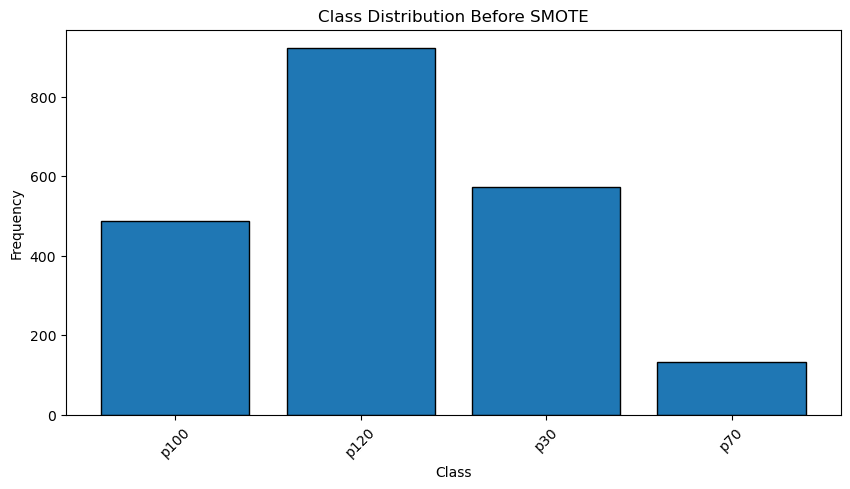

In [14]:

# Extract features and target
X = cm_df.drop(columns=['label']).astype('float32')
y = cm_df['label']

# Encode labels into integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Plot class distribution before SMOTE using a bar chart
plt.figure(figsize=(10, 5))
class_counts = np.bincount(y_encoded)  # Count occurrences of each class
plt.bar(range(len(label_encoder.classes_)), class_counts, edgecolor='black')

plt.xticks(range(len(label_encoder.classes_)), label_encoder.classes_, rotation=45)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Class Distribution Before SMOTE")
plt.show()


C:\Users\olanr\anaconda3\envs\Vision_env\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
  File "C:\Users\olanr\anaconda3\envs\Vision_env\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\olanr\anaconda3\envs\Vision_env\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\olanr\anaconda3\envs\Vision_env\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\olanr\anaconda3\envs\Vision_env\lib\subprocess.py", line 1436, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


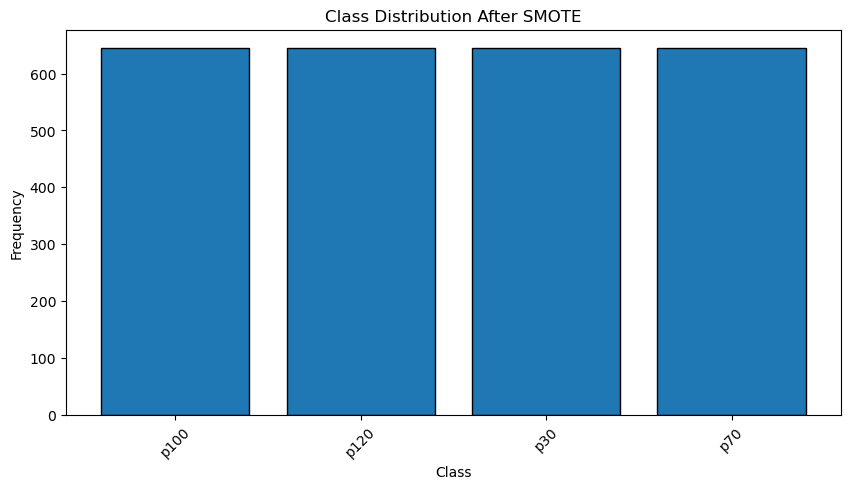

In [15]:

# Convert labels to categorical (one-hot encoding)
y_one_hot = tf.keras.utils.to_categorical(y_encoded)

# Split dataset into 70% train, 30% temp (for validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Plot class distribution after SMOTE using a bar chart
plt.figure(figsize=(10, 5))
class_counts_resampled = np.bincount(y_train_resampled)  # Count occurrences of each class
plt.bar(range(len(label_encoder.classes_)), class_counts_resampled, edgecolor='black')
plt.xticks(range(len(label_encoder.classes_)), label_encoder.classes_, rotation=45)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Class Distribution After SMOTE")
plt.show()

# Convert resampled labels to one-hot encoding
y_train_resampled_one_hot = tf.keras.utils.to_categorical(y_train_resampled)

# Split temp into 20% validation, 10% test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=1/3, random_state=42, stratify=y_temp
)

# Convert validation & test labels to one-hot encoding
y_val_one_hot = tf.keras.utils.to_categorical(y_val)
y_test_one_hot = tf.keras.utils.to_categorical(y_test)


# **ANN MODEL ACHITECTURE**

In [17]:
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Sequential

# Initialize the Sequential model
model = Sequential()

# Define the input layer
model.add(Input(shape=(X_train_resampled.shape[1],)))

# Add a few hidden layers with dropout for regularization
model.add(Dense(units=128, activation='relu'))  # First hidden layer with 128 units
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting

model.add(Dense(units=64, activation='relu'))  # Second hidden layer with 64 units
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting

model.add(Dense(units=32, activation='relu'))  # Third hidden layer with 32 units
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting

# Add another hidden layer
model.add(Dense(units=16, activation='relu'))  # Fourth hidden layer with 16 units

# Output layer with softmax activation for multi-class classification
model.add(Dense(units=len(label_encoder.classes_), activation='softmax'))

# Display model summary
model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       128,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139,060 (543.20 KB)

 Trainable params: 139,060 (543.20 KB)

 Non-trainable params: 0 (0.00 B)

# **TRAINING AND EVALUATION**

In [19]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model with validation
history = model.fit(
    X_train_resampled, y_train_resampled_one_hot,
    validation_data=(X_val, y_val_one_hot),
    epochs=50, batch_size=32
)

Epoch 1/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3052 - loss: 1.3790 - val_accuracy: 0.4823 - val_loss: 1.2711
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5390 - loss: 1.1251 - val_accuracy: 0.7376 - val_loss: 0.6927
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6967 - loss: 0.7260 - val_accuracy: 0.7612 - val_loss: 0.5505
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7828 - loss: 0.5234 - val_accuracy: 0.8085 - val_loss: 0.4569
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8225 - loss: 0.4296 - val_accuracy: 0.8014 - val_loss: 0.4337
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8689 - loss: 0.3389 - val_accuracy: 0.8392 - val_loss: 0.3779
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8920 - loss: 0.2704 - val_accuracy: 0.8652 - val_loss: 0.3531
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9179 - loss: 0.2101 - val_accuracy: 0.8652 - val_loss:

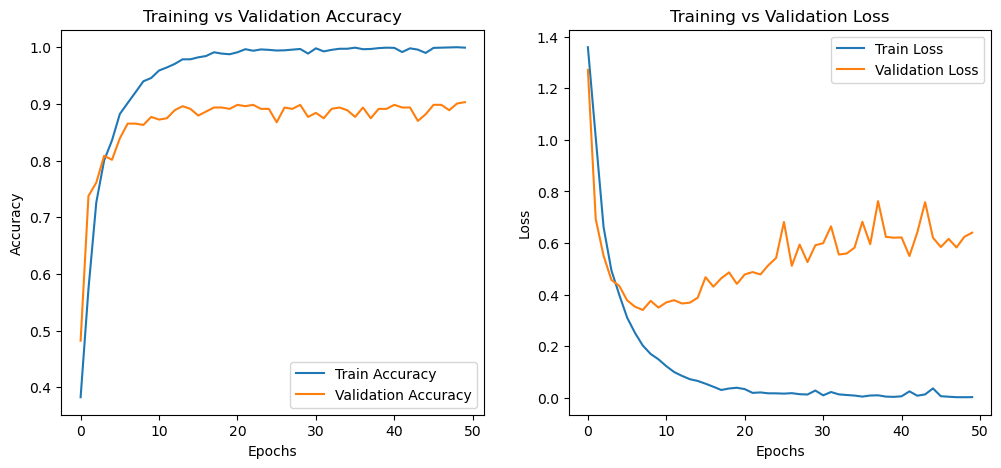

In [20]:
# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()

In [21]:
from tensorflow.keras.models import load_model

# Save the model in the native Keras format
model.save("mlp_model_smote.keras")

# Load the saved model
model = load_model("mlp_model_smote.keras")
# Recompile the model with the optimizer and settings used when saving the model
model.compile(optimizer='adam',  # Replace this with the exact optimizer and settings you used
              loss='categorical_crossentropy',  # Ensure the correct loss function is used
              metrics=['accuracy'])  # Replace this with the metrics you used


In [22]:
# Evaluate model on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_one_hot)
print(f"Test Accuracy: {test_accuracy:.4f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9244 - loss: 0.3209  
Test Accuracy: 0.9387


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


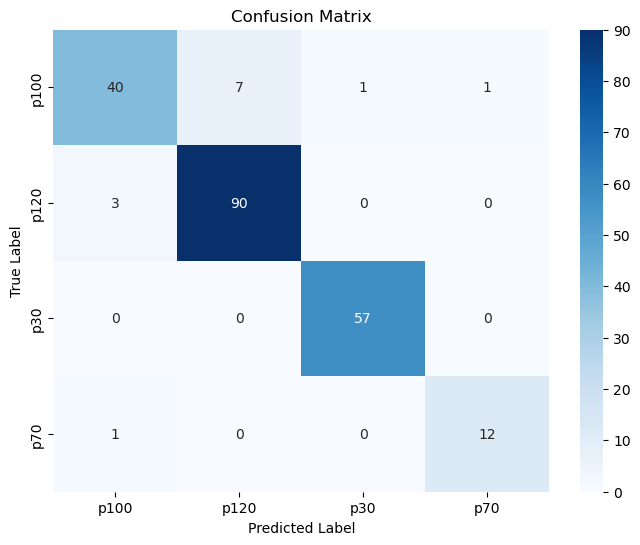

<Figure size 640x480 with 0 Axes>

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Get model predictions on test set
y_true = y_test  # True labels (no need to use argmax if they're already in integer form)
y_pred = model.predict(X_test)  # Make predictions on the test set

# Get predicted class indices
y_pred = y_pred.argmax(axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

plt.savefig("confusion_matrix_MLP.png", dpi=600, bbox_inches='tight')


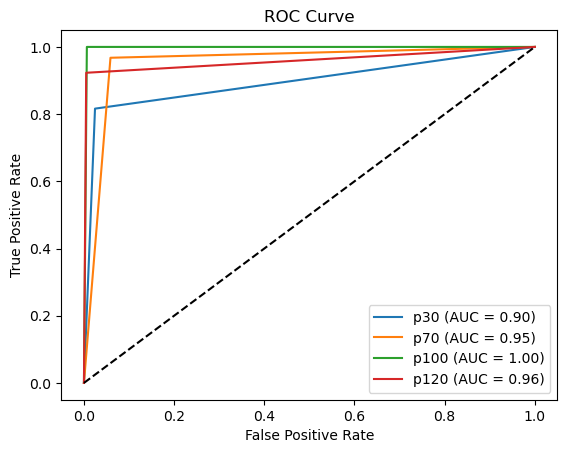

Weighted Average AUC: 0.95


In [24]:
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Define class labels
class_labels = ["p30", "p70", "p100", "p120"]

# Assuming y_true and y_pred are your ground-truth and predicted class indices
# Convert labels to one-hot encoding
y_true_one_hot = to_categorical(y_true, num_classes=4)
y_pred_one_hot = to_categorical(y_pred, num_classes=4)

# Get the number of true instances for each class (for weighting)
class_counts = [np.sum(y_true == i) for i in range(len(class_labels))]

# Initialize lists for AUCs
AUCs = []

# Compute ROC curves and AUC for each class
for i, class_name in enumerate(class_labels):
    fpr, tpr, _ = roc_curve(y_true_one_hot[:, i], y_pred_one_hot[:, i])
    auc_score = auc(fpr, tpr)
    AUCs.append(auc_score)

    # Plot the ROC curve for each class
    plt.plot(fpr, tpr, label=f"{class_name} (AUC = {auc_score:.2f})")

# Plot reference line for random guessing
plt.plot([0, 1], [0, 1], 'k--')

# Labels and title for the ROC plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Compute the weighted average AUC
total_samples = np.sum(class_counts)
weighted_AUC = np.sum([AUCs[i] * class_counts[i] for i in range(len(AUCs))]) / total_samples

# Display the weighted average AUC
print(f"Weighted Average AUC: {weighted_AUC:.2f}")



In [28]:
from sklearn.metrics import classification_report, accuracy_score

# Define class labels
class_labels = label_encoder.classes_

# Compute classification metrics
report = classification_report(y_true, y_pred, target_names=class_labels)
accuracy = accuracy_score(y_true, y_pred)

# Display results
print("Classification Report:\n", report)
print(f"Accuracy: {accuracy:.2f}")

Classification Report:
               precision    recall  f1-score   support

        p100       0.91      0.82      0.86        49
        p120       0.93      0.97      0.95        93
         p30       0.98      1.00      0.99        57
         p70       0.92      0.92      0.92        13

    accuracy                           0.94       212
   macro avg       0.94      0.93      0.93       212
weighted avg       0.94      0.94      0.94       212

Accuracy: 0.94


In [32]:
# Define class labels in order
class_labels = ["p30", "p70", "p100", "p120"]

# Get the number of samples in each class (for weighting)
class_counts = [np.sum(y_true == label) for label in range(len(class_labels))]

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
n_classes = conf_matrix.shape[0]

# Initialize lists
TPR = []  # Sensitivity
TNR = []  # Specificity

# Compute TPR and TNR for each class
for i, class_name in enumerate(class_labels):
    TP = conf_matrix[i, i]
    FN = conf_matrix[i, :].sum() - TP
    FP = conf_matrix[:, i].sum() - TP
    TN = conf_matrix.sum() - (TP + FN + FP)

    tpr = TP / (TP + FN) if (TP + FN) != 0 else 0
    tnr = TN / (TN + FP) if (TN + FP) != 0 else 0

    TPR.append(tpr)
    TNR.append(tnr)

    print(f"Class {class_name} - TPR (Sensitivity): {tpr:.2f}, TNR (Specificity): {tnr:.2f}")

# Compute weighted averages for TPR and TNR
total_samples = np.sum(class_counts)
weighted_TPR = np.sum([TPR[i] * class_counts[i] for i in range(n_classes)]) / total_samples
weighted_TNR = np.sum([TNR[i] * class_counts[i] for i in range(n_classes)]) / total_samples

# Display weighted averages
print(f"\nWeighted Average TPR (Sensitivity): {weighted_TPR:.2f}")
print(f"Weighted Average TNR (Specificity): {weighted_TNR:.2f}")


Class p30 - TPR (Sensitivity): 0.82, TNR (Specificity): 0.98
Class p70 - TPR (Sensitivity): 0.97, TNR (Specificity): 0.94
Class p100 - TPR (Sensitivity): 1.00, TNR (Specificity): 0.99
Class p120 - TPR (Sensitivity): 0.92, TNR (Specificity): 0.99

Weighted Average TPR (Sensitivity): 0.94
Weighted Average TNR (Specificity): 0.97


In [7]:
import numpy as np
from sklearn.metrics import cohen_kappa_score, mean_absolute_error, mean_squared_error

# Label encoding mapping
label_map = {'p100': 0, 'p120': 1, 'p30': 2, 'p70': 3}

# Confusion matrix extracted from the image (MLP)
# Rows: true labels, Columns: predicted labels
conf_matrix = np.array([
    [40, 7, 1, 1],  # True p100 (0)
    [3, 90, 0, 0],  # True p120 (1)
    [0, 0, 57, 0],  # True p30  (2)
    [1, 0, 0, 12]   # True p70  (3)
])

# Generate true and predicted label lists
true_labels = []
pred_labels = []

for true_class in range(conf_matrix.shape[0]):
    for pred_class in range(conf_matrix.shape[1]):
        count = conf_matrix[true_class, pred_class]
        true_labels.extend([true_class] * count)
        pred_labels.extend([pred_class] * count)

# Calculate metrics
kappa = cohen_kappa_score(true_labels, pred_labels)
mae = mean_absolute_error(true_labels, pred_labels)
rmse = np.sqrt(mean_squared_error(true_labels, pred_labels))


# Relative errors
mean_true = np.mean(true_labels)
rae = np.sum(np.abs(np.array(true_labels) - np.array(pred_labels))) / np.sum(np.abs(np.array(true_labels) - mean_true))
rrse = np.sqrt(np.sum((np.array(true_labels) - np.array(pred_labels))**2) / np.sum((np.array(true_labels) - mean_true)**2))

metrics={
        "Correctly classified": np.trace(conf_matrix),
        "Incorrectly classified": np.sum(conf_matrix) - np.trace(conf_matrix),
        "Total instances": np.sum(conf_matrix),
        "Kappa statistic": round(kappa, 4),
        "Mean Absolute Error": round(mae, 4),
        "Root Mean Squared Error": round(rmse, 4),
        "Relative Absolute Error (%)": round(rae * 100, 2),
        "Root Relative Squared Error (%)": round(rrse * 100, 2)
    }

# Convert to plain Python types
clean_metrics = {k: float(v) if isinstance(v, (np.float32, np.float64)) else int(v) for k, v in metrics.items()}

print(clean_metrics)

{'Correctly classified': 199, 'Incorrectly classified': 13, 'Total instances': 212, 'Kappa statistic': 0.909, 'Mean Absolute Error': 0, 'Root Mean Squared Error': 0.3885, 'Relative Absolute Error (%)': 12.54, 'Root Relative Squared Error (%)': 45.8}
